<h1  style="text-align: center" class="list-group-item list-group-item-action active">Introduction</h1><a id = "1" ></a>

When it comes to machine learning problems, there are lot of different types of metrics in the real world. We will see some of the most common metrics that we can use when starting with our projects.

If we talk about classification problems, the most common metrics used are:
- Accuracy
- Precision (P)
- Recall (R)
- F1 score (F1)
- Area under the ROC (Receiver Operating Characteristic) curve or simply AUC (AUC)

![](https://blog.skyl.ai/hs-fs/hubfs/Evaluating%20a%20Machine%20Learning%20Model-min.jpg?width=1425&name=Evaluating%20a%20Machine%20Learning%20Model-min.jpg)

**In this notebook my focus will be on Multiclass classification problems means how we can use above mentioned evaluation metrics for Multiclass classification problems**

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_wine = pd.read_csv('winequality-red.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
X = df_wine.drop('quality', axis = 1)
y = df_wine['quality']

####ADD YOUR CODE HERE####
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 893)
####END CODE HERE####


Let's create a common trained model which we can use to illustrate various evaluation metrics

Read about Random Forest Classifier in [this link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [15]:
#Common Trained Model

model = RandomForestClassifier()

###ADD YOUR CODE HERE###
"""
You have two tasks here:
1. Train the model using the training data. Use the fit method by looking at the documentation.
2. Predict the quality of the wine using the test data. Use the predict method by looking at the documentation.
"""
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
###END CODE HERE###
print("y_pred=", y_pred)

y_pred= [7 5 6 5 6 6 5 5 6 5 5 6 6 6 6 6 5 5 5 6 5 5 5 7 6 6 7 6 6 6 5 5 6 7 5 5 5
 6 6 5 5 5 5 7 6 5 5 5 5 6 5 6 5 5 5 6 6 6 6 6 5 5 6 5 7 6 5 5 5 5 5 6 5 5
 5 7 5 6 5 5 6 5 6 6 7 7 5 5 6 6 6 5 6 6 6 6 5 6 5 6 5 6 6 5 6 5 5 6 6 6 6
 5 7 5 5 6 6 5 6 5 6 5 6 6 5 6 6 6 6 5 7 5 5 7 5 5 6 7 6 5 7 5 6 6 6 5 6 5
 5 6 5 5 5 5 6 8 5 6 7 5 5 6 6 7 7 6 5 5 5 5 7 6 5 5 6 6 5 5 5 5 6 6 6 6 6
 5 6 6 6 5 5 6 6 5 7 6 6 5 5 6 6 6 6 5 5 7 6 5 5 5 6 6 6 5 6 6 6 5 5 5 5 6
 5 6 5 5 6 6 5 6 6 5 6 5 6 6 5 6 5 6 5 5 6 5 6 6 6 7 7 7 5 5 5 5 5 5 5 6 7
 6 5 5 5 5 5 6 5 6 5 6 5 6 5 6 7 7 6 6 5 6 5 6 6 6 6 5 7 6 5 6 5 6 5 7 6 5
 5 5 6 7 6 6 5 5 5 6 5 5 6 7 6 5 5 6 6 7 5 6 6 6]


<h1  style="text-align: center" class="list-group-item list-group-item-action active">Accuracy metrics</h1><a id = "2" ></a>

- **[Accuracy](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)** : It is one of the most straightforward metrics used in machine learning. It defines how accurate your model is. For example, if you build a model that classifies 90 samples accurately, your accuracy is 90% or 0.90. If only 83 samples are classified correctly, the accuracy of your model is 83% or 0.83. Simple.
             


In [30]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    -> param y_true: list of true values
    -> param y_pred: list of predicted values
    -> return: accuracy score
    
    """
    #### ADD YOUR CODE HERE ####
    # Intitializing variable to store count of correctly predicted classes
    #okok so i had tried this many different ways and i really over complicated this
    #turns out the formula tells you what to do
    # the len of y_true and y_pred are the same, so for all items in each list, compare if the predicted val matches the true val
    # if there is a match += 1 to the correct predictions. Otherwise the prediction was incorrect
    # accuracy is how many correct predictions / total num of predictions
    
    #print(len(y_true)) #-->len = 320 therefor index 0,319
    #print(len(y_pred))
    y_vals=[]
    for i in y_true:
        y_vals.append(i)
        
    for j in y_pred:
        y_vals.append(j)
        
        
    #from y_vals, compare index 0 to index 320. If index 0 == index 320, correctpredictions+=1
    # then i will increment
    #print("#############################################################")
    #print(len(y_vals))
    correct_predictions = 0
    
    for x in range(0,len(y_vals)//2):
        z = x+320
        #print(x)
        #print(z)
        
        if y_vals[x] == y_vals[z]:
            correct_predictions += 1
    
    #returns accuracy
    return correct_predictions / len(y_true)
    ### END CODE HERE ###

SyntaxError: name 'y_true' is parameter and global (Temp/ipykernel_18476/3121526986.py, line 19)

In [28]:
accuracy(y_test, y_pred)

278     8
1374    3
970     6
1129    6
1021    6
       ..
901     7
1252    5
1451    7
1224    6
680     5
Name: quality, Length: 320, dtype: int64


0.65

We can also calculate accuracy using scikit-learn.

**[Scikit-learn user guide for accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)**

In [19]:
print(metrics.accuracy_score(y_test, y_pred))
confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
confusionMatrix2 = metrics.confusion_matrix(y_pred, y_test)

print(confusionMatrix)
print(confusionMatrix2)

0.65
[[ 0  0  3  0  0  0]
 [ 0  0  7  2  0  0]
 [ 0  0 93 26  2  0]
 [ 0  0 42 93  4  0]
 [ 0  0  2 18 21  0]
 [ 0  0  0  2  4  1]]
[[ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 3  7 93 42  2  0]
 [ 0  2 26 93 18  2]
 [ 0  0  2  4 21  4]
 [ 0  0  0  0  0  1]]


<h1  style="text-align: center" class="list-group-item list-group-item-action active">Precision</h1><a id = "3" ></a>


- **[Precision](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)** :  Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good

     **[True Positives (TP)](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)** - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted  class is also yes. E.g. if actual class value indicates that this passenger survived and predicted class tells you the same thing.

     **[True Negatives (TN)](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)** - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no. E.g. if actual class says this passenger did not survive and predicted class tells you the same thing.

     False positives and false negatives, these values occur when your actual class contradicts with the predicted class.

     **[False Positives (FP)](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)** – When actual class is no and predicted class is yes. E.g. if actual class says this passenger did not survive but predicted class tells you that this passenger will survive.

     **[False Negatives (FN)](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)** – When actual class is yes but predicted class in no. E.g. if actual class value indicates that this passenger survived and predicted class tells you that passenger will die.
     

<h2 style = "text-align: center"> Precision = TP / (TP + FP) </h2>

If we have to define accuracy using the terms described above, we can write:

<h2 style = "text-align: center">Accuracy Score = (TP + TN) / (TP + TN + FP + FN) </h2>


Let's Create functions to compute True Positives, True Negatives, False Positives and False Negatives

In [33]:
# Functions to compute True Positives, True Negatives, False Positives and False Negatives
def get_y_vals(y_true, y_pred):
    y_vals=[]
    for i in y_true:
        y_vals.append(i)
    for j in y_pred:
        y_vals.append(j)
    return y_vals

#options 3,4,5,6,7,8

def true_positive(y_true, y_pred):
    y_vals = get_y_vals(y_true, y_pred)
    tp = 0
    
    ### ADD YOUR CODE HERE ###
    for x in range(0,len(y_vals)//2):
        z = x+320
        #print(x)
        #print(z)
        
        if y_vals[x] == y_vals[z]:
            tp += 1
    ### END CODE HERE ###
    
    return tp

def true_negative(y_true, y_pred):
    y_vals = get_y_vals(y_true, y_pred)
    tn = 0
    
    ### ADD YOUR CODE HERE ###
    # Compute the true negatives here
     for x in range(0,len(y_vals)//2):
        z = x+320
        #print(x)
        #print(z)
        #if my true value != my predicted value if i guess 4 but the answer is 3, I predicted wrong therefore TN
        if (y_vals[x] == 3 and y_vals[z]==4) or (y_vals[x] == 3 and y_vals[z]==5) or (y_vals[x] == 3 and y_vals[z]==6) or (y_vals[x] == 3 and y_vals[z]==7) or (y_vals[x] == 3 and y_vals[z]==8):
            tn += 1
    
    ### END CODE HERE ###
            
    return tn

def false_positive(y_true, y_pred):
    y_vals = get_y_vals(y_true, y_pred)
    fp = 0
    
    ### ADD YOUR CODE HERE ###
    # Compute the false positives here
    for x in range(0,len(y_vals)//2):
        z = x+320
        #print(x)
        #print(z)
        #if i predict a 4 and 
        if (y_vals[x] == 3 and y_vals[z]==4) or (y_vals[x] == 3 and y_vals[z]==5) or (y_vals[x] == 3 and y_vals[z]==6) or (y_vals[x] == 3 and y_vals[z]==7) or (y_vals[x] == 3 and y_vals[z]==8):
            tn += 1
    ### END CODE HERE ###

    return fp

def false_negative(y_true, y_pred):
    
    fn = 0
    
    ### ADD YOUR CODE HERE ###
    # Compute the false negatives here
    
    ### END CODE HERE ###
            
    return fn

true_positive(y_test, y_pred)

208

**Approch To compute precision of multi class classification problem**

There are two different ways to calculate this which might get confusing from time to time. We know that precision depends on true positives and false positives.

- **Macro averaged precision**: calculate precision for all classes individually and then average them
- **Micro averaged precision**: calculate class wise true positive and false positive and then use that to calculate overall precision


Let’s see how macro-averaged precision is implemented.

In [10]:
#Computation of macro-averaged precision

def macro_precision(y_true, y_pred):

    # find the number of unique classes
    num_classes = len(np.unique(y_true))

    # initialize precision to 0
    precision = 0
    
    # loop over all classes individually and then average them
    ### ADD YOUR CODE HERE ###
    
    ### END CODE HERE ###
        
    # calculate and return average precision over all classes
    precision /= num_classes
    
    return precision


In [11]:
print(f"Macro-averaged Precision score : {macro_precision(y_test, y_pred) }")

Macro-averaged Precision score : 0.49468866590125055


Let's see how we can implement marco-averaged precision using sklearn

**[Scikit-learn user guide for Precision ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)**

In [20]:
macro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'macro')

C:\Users\amrit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(f"Macro-Averaged Precision score using sklearn library : {macro_averaged_precision}")

Macro-Averaged Precision score using sklearn library : 0.4946888377739442


Let’s see how micro-averaged precision is implemented.

In [14]:
def micro_precision(y_true, y_pred):


    # find the number of classes 
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    
    # loop over all classes
    ### ADD YOUR CODE HERE ###
    # calculate class wise true positive and false positive and then use that to calculate overall precision
    
    
    ### END CODE HERE ###
        
    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

In [15]:
print(f"Micro-averaged Precision score : {micro_precision(y_test, y_pred)}")

Micro-averaged Precision score : 0.653125


Let's see how we can implement mirco-averaged precision using sklearn

**[Scikit-learn user guide for Precision ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)**

In [16]:
micro_averaged_precision = metrics.precision_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged Precision score using sklearn library : {micro_averaged_precision}")

Micro-Averaged Precision score using sklearn library : 0.653125


<h1  style="text-align: center" class="list-group-item list-group-item-action active">Recall</h1><a id = "4" ></a>


- **[Recall(Sensitivity)](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)** : Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived

<h2 style = "text-align: center"> Recall = TP / (TP + FN) </h2>



**Approch To compute recall of multi class classification problem**

There are two different ways to calculate this which might get confusing from time to time. We know that recall depends on true positives and false negatives.

- **Macro averaged recall**: calculate recall for all classes individually and then average them
- **Micro averaged recall**: calculate class wise true positive and false negative and then use that to calculate overall recall


Let’s see how macro-averaged recall is implemented.

In [17]:
#Computation of macro-averaged recall

def macro_recall(y_true, y_pred):

    # find the number of classes
    num_classes = len(np.unique(y_true))

    # initialize recall to 0
    recall = 0
    
    # loop over all classes
    for class_ in list(y_true.unique()):
        
    ### ADD YOUR CODE HERE ###
    
    ### END CODE HERE ###
        
    # calculate and return average recall over all classes
    recall /= num_classes
    
    return recall


In [18]:
print(f"Macro-averaged recall score : {macro_recall(y_test, y_pred)}")

Macro-averaged recall score : 0.34711837601058576


Let's see how we can implement macro-averaged recall using sklearn

 **[Scikit-learn user guide for Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)**


In [19]:
macro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'macro')
print(f"Macro-averaged recall score using sklearn : {macro_averaged_recall}")

Macro-averaged recall score using sklearn : 0.34711838327305156


Let’s see how micro-averaged recall is implemented.

In [20]:
def micro_recall(y_true, y_pred):


    # find the number of classes 
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fn = 0
    
    # loop over all classes
    for class_ in y_true.unique():
        
         ### ADD YOUR CODE HERE ###
    
        ### END CODE HERE ###
        
    # calculate and return overall recall
    recall = tp / (tp + fn)
    return recall

In [21]:
print(f"Micro-averaged recall score : {micro_recall(y_test, y_pred)}")

Micro-averaged recall score : 0.653125


Let's see how we can implement micro-averaged recall using sklearn

 **[Scikit-learn user guide for Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)**


In [22]:
micro_averaged_recall = metrics.recall_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged recall score using sklearn library : {micro_averaged_recall}")

Micro-Averaged recall score using sklearn library : 0.653125


<h1  style="text-align: center" class="list-group-item list-group-item-action active">F1 score</h1><a id = "5" ></a>


- **[F1 score (F1)](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/)** : F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

F1 score is a metric that combines both precision and recall. It is defined as a simple weighted average (harmonic mean) of precision and recall. If we denote precision using P and recall using R, we can represent the F1 score as:

<h2 style = "text-align: center"> F1 = 2PR / (P + R) </h2>



**Approch To compute F1 Score of multi class classification problem**

There are two different ways to calculate this which might get confusing from time to time. We know that F1 Score depends on precision and recall.

- **Macro averaged F1 Score**: calculate f1 score of every class and then average them
- **Micro averaged F1 Score**: calculate macro-averaged precision score and macro-averaged recall score and then take there harmonic mean


Let’s see how macro-averaged f1 score is implemented.

In [23]:
#Computation of macro-averaged fi score

def macro_f1(y_true, y_pred):

    # find the number of classes
    num_classes = len(np.unique(y_true))

    # initialize f1 to 0
    f1 = 0
    
    # loop over all classes
    for class_ in list(y_true.unique()):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        
         ### ADD YOUR CODE HERE ###
    
        ### END CODE HERE ###
        
        # keep adding f1 score for all classes
        f1 += temp_f1
        
    # calculate and return average f1 score over all classes
    f1 /= num_classes
    
    return f1


In [24]:
print(f"Macro-averaged f1 score : {macro_f1(y_test, y_pred)}")


Macro-averaged f1 score : 0.3642205099985299


Let's see how we can implement micro-averaged F1 score using sklearn

**[Scikit-learn user guide for F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)**

In [25]:
macro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")

Macro-Averaged F1 score using sklearn library : 0.3642208086226039


Let’s see how micro-averaged f1 score is implemented.

In [26]:
def micro_f1(y_true, y_pred):


    #micro-averaged precision score
    P = micro_precision(y_true, y_pred)

    #micro-averaged recall score
    R = micro_recall(y_true, y_pred)

    #micro averaged f1 score
    f1 = 2*P*R / (P + R)    

    return f1

In [27]:
print(f"Micro-averaged recall score : {micro_f1(y_test, y_pred)}")


Micro-averaged recall score : 0.653125


Let's see how we can implement micro-averaged F1 score using sklearn

**[Scikit-learn user guide for F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)**

In [28]:
micro_averaged_f1 = metrics.f1_score(y_test, y_pred, average = 'micro')
print(f"Micro-Averaged F1 score using sklearn library : {micro_averaged_f1}")

Micro-Averaged F1 score using sklearn library : 0.653125


<h1  style="text-align: center" class="list-group-item list-group-item-action active">Area under the ROC curve</h1><a id = "6" ></a>


- **[Area under the ROC (Receiver Operating Characteristic) curve](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)** : AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

     **[Scikit-learn user guide for AUC under the ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)**
     
 ![](https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png?w=576)

**Approch to compute AUC score of multi class classification problem**

**One vs All** : It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

In [29]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [30]:
roc_auc_dict = roc_auc_score_multiclass(y_test, y_pred)
roc_auc_dict

{3: 0.5,
 4: 0.5,
 5: 0.7636945055857801,
 6: 0.6953177789260304,
 7: 0.7259812920709852,
 8: 0.5714285714285714}

<h1  style="text-align: center" class="list-group-item list-group-item-action active">Confusion Matrix</h1><a id = "7" ></a>

- **[Confusion Matrix](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)** : A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

![](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)     


    **[Scikit-Learn user guide for Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)**

In [21]:
y_test.unique()

array([8, 3, 6, 5, 7, 4], dtype=int64)

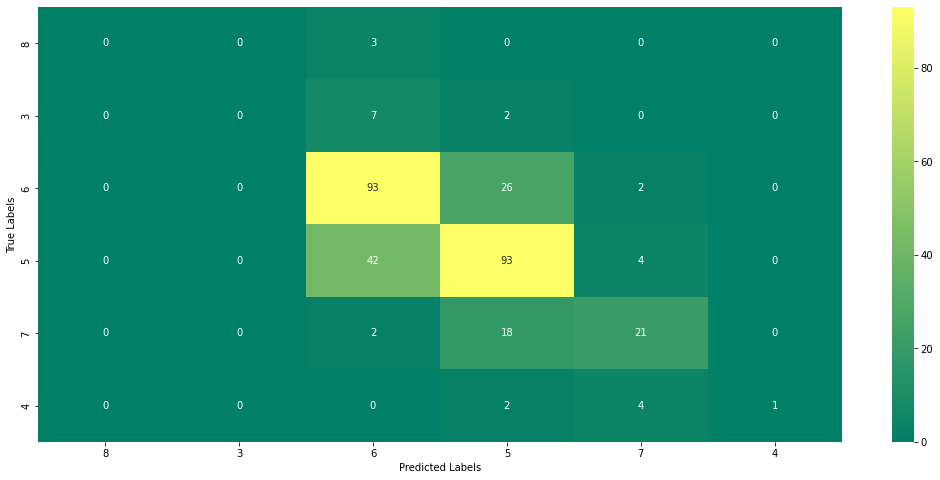

In [22]:
plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()